# **Importing all Required libraries**


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('/content/hr_dataset.csv')

In [116]:
df.head()

,EmployeeID,Age,Department,Attrition,Salary,Experience,Education,Gender
0,1,48.0,Finance,No,98029.85,26,Masters,Male
1,2,27.0,Sales,Yes,118027.57,1,High School,Female
2,3,54.0,IT,No,86644.48,27,Bachelors,Male
3,4,NaN,Engineering,No,NaN,6,PhD,Male
4,5,46.0,Sales,No,65831.59,4,High School,Male


In [117]:
df.sample(n=5)

,EmployeeID,Age,Department,Attrition,Salary,Experience,Education,Gender
78,79,22.0,Engineering,No,35000.0,0,Masters,Male
150,151,48.0,IT,No,75289.58,19,PhD,Male
785,786,43.0,Finance,No,NaN,18,Masters,Male
1089,1090,42.0,Sales,No,50279.72,18,Bachelors,Female
1385,1386,35.0,sales,No,103178.37,11,Bachelors,Female


In [118]:
df.shape

(1500, 8)

# Exploratory Data Analysis(EDA)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeID  1500 non-null   int64  
 1   Age         1440 non-null   float64
 2   Department  1500 non-null   object 
 3   Attrition   1500 non-null   object 
 4   Salary      1415 non-null   object 
 5   Experience  1500 non-null   int64  
 6   Education   1500 non-null   object 
 7   Gender      1484 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 93.9+ KB


In [120]:

df.describe()

,EmployeeID,Age,Experience
count,1500.000000,1440.000000,1500.000000
mean,750.500000,40.987500,9.802667
std,433.157015,11.483008,8.919235
min,1.000000,22.000000,0.000000
25%,375.750000,31.000000,2.000000
50%,750.500000,41.000000,7.000000
75%,1125.250000,51.000000,15.000000
max,1500.000000,60.000000,37.000000


In [121]:
df.isnull().sum()

,0
EmployeeID,0
Age,60
Department,0
Attrition,0
Salary,85
Experience,0
Education,0
Gender,16


# Clean Each Column

In [122]:
df_clean = df.copy()

# Fill missing values in Salary and Age with mean
df_clean['Salary'] = pd.to_numeric(df_clean['Salary'], errors='coerce')
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean['Experience'] = pd.to_numeric(df_clean['Experience'], errors='coerce')

df_clean['Salary'] = df_clean['Salary'].fillna(df_clean['Salary'].mean())
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].mean())
df_clean.head()

,EmployeeID,Age,Department,Attrition,Salary,Experience,Education,Gender
0,1,48.0000,Finance,No,98029.850000,26,Masters,Male
1,2,27.0000,Sales,Yes,118027.570000,1,High School,Female
2,3,54.0000,IT,No,86644.480000,27,Bachelors,Male
3,4,40.9875,Engineering,No,75283.514169,6,PhD,Male
4,5,46.0000,Sales,No,65831.590000,4,High School,Male


In [123]:
df_clean = df_clean.dropna()

In [124]:
df_clean.isnull().sum()

,0
EmployeeID,0
Age,0
Department,0
Attrition,0
Salary,0
Experience,0
Education,0
Gender,0


In [125]:
df_clean.shape

(1484, 8)

In [135]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


# **Standardize Formats**

In [126]:
df_clean['Department'] =  df_clean['Department'].str.strip().str.capitalize()
df_clean['Attrition'] =  df_clean['Attrition'].str.strip().str.capitalize()
df_clean['Education'] =  df_clean['Education'].str.strip().str.capitalize()
df_clean['Gender'] =  df_clean['Gender'].str.strip().str.capitalize()
df_clean.head()

,EmployeeID,Age,Department,Attrition,Salary,Experience,Education,Gender
0,1,48.0000,Finance,No,98029.850000,26,Masters,Male
1,2,27.0000,Sales,Yes,118027.570000,1,High school,Female
2,3,54.0000,It,No,86644.480000,27,Bachelors,Male
3,4,40.9875,Engineering,No,75283.514169,6,Phd,Male
4,5,46.0000,Sales,No,65831.590000,4,High school,Male


# **Encode Categorical columns**

In [127]:
df_clean["EmployeeID"].nunique()

1484

<Axes: xlabel='Gender'>

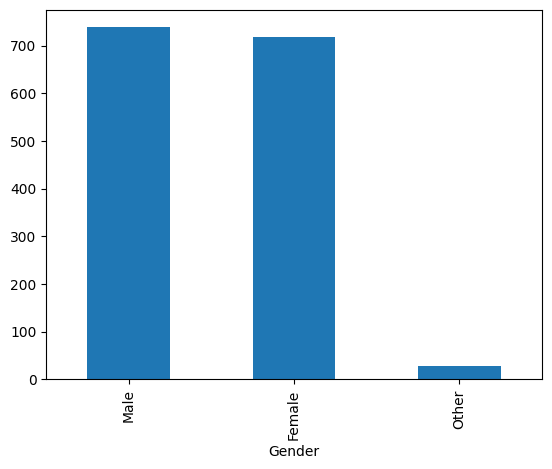

In [128]:
df_clean['Gender'].value_counts().plot(kind = 'bar')

In [129]:
df_clean['Gender'].value_counts(normalize = True).map("{:.2f}".format)

,proportion
Gender,
Male,0.50
Female,0.48
Other,0.02


In [130]:
categorical_cols = df_clean.select_dtypes(include = 'O').columns.to_list()
print(categorical_cols)

['Department', 'Attrition', 'Education', 'Gender']


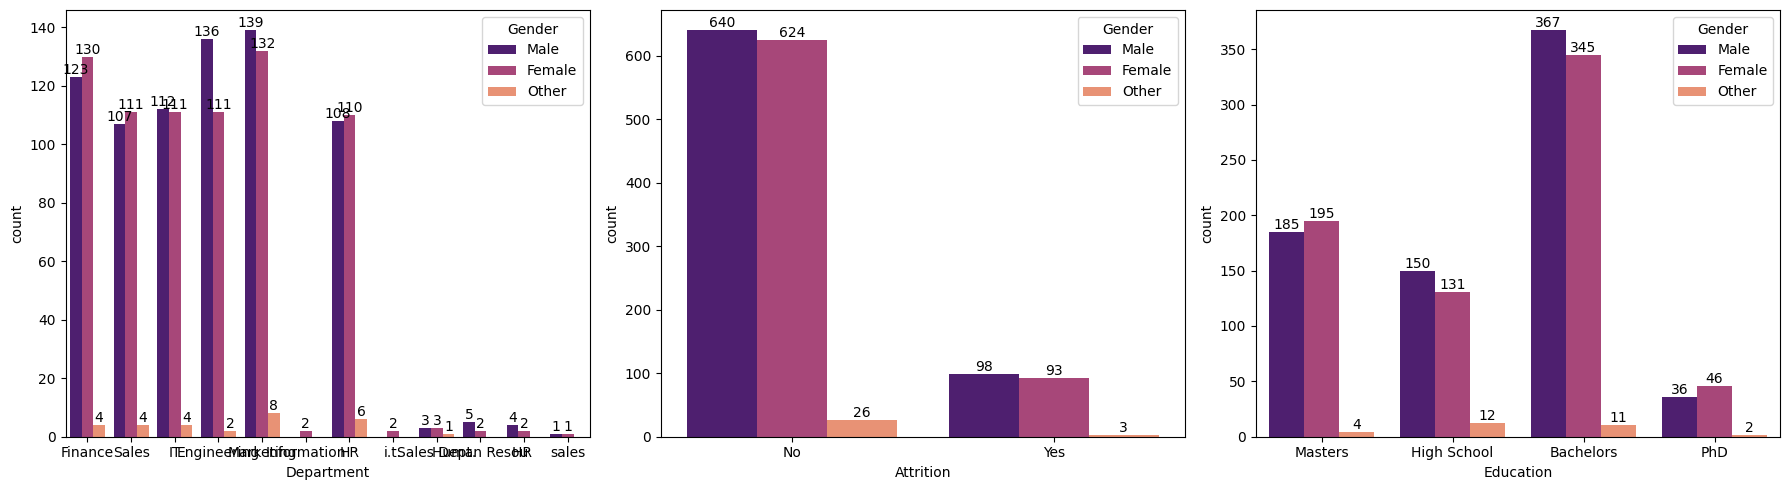

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Loop through columns and draw countplots with hue as 'Gender'
for col, subplot in zip(categorical_cols, axes.flatten()):
    plot = sns.countplot(data=df, x=col, hue='Gender', ax=subplot, palette='magma')
    for container in plot.containers:
        plot.bar_label(container)

plt.tight_layout()
plt.show()

In [132]:
df_clean['Gender'] = df_clean['Gender'].map({'Male': 1, 'Female':0})
df_clean['Attrition'] = df_clean['Attrition'].map({'Yes': 1, 'No':0})
df_clean.head()

,EmployeeID,Age,Department,Attrition,Salary,Experience,Education,Gender
0,1,48.0000,Finance,0,98029.850000,26,Masters,1.0
1,2,27.0000,Sales,1,118027.570000,1,High school,0.0
2,3,54.0000,It,0,86644.480000,27,Bachelors,1.0
3,4,40.9875,Engineering,0,75283.514169,6,Phd,1.0
4,5,46.0000,Sales,0,65831.590000,4,High school,1.0


In [133]:
df_clean = pd.get_dummies(df_clean, columns = ['Department', 'Education'], dtype = int)
df_clean.head()

,EmployeeID,Age,Attrition,Salary,Experience,Gender,Department_Engineering,Department_Finance,Department_Hr,Department_Human resou,Department_I.t.,Department_Information,Department_It,Department_Marketing,Department_Sales,Department_Sales dept.,Education_Bachelors,Education_High school,Education_Masters,Education_Phd
0,1,48.0000,0,98029.850000,26,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2,27.0000,1,118027.570000,1,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,3,54.0000,0,86644.480000,27,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,4,40.9875,0,75283.514169,6,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,46.0000,0,65831.590000,4,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


# **Attrition Rate by Department**

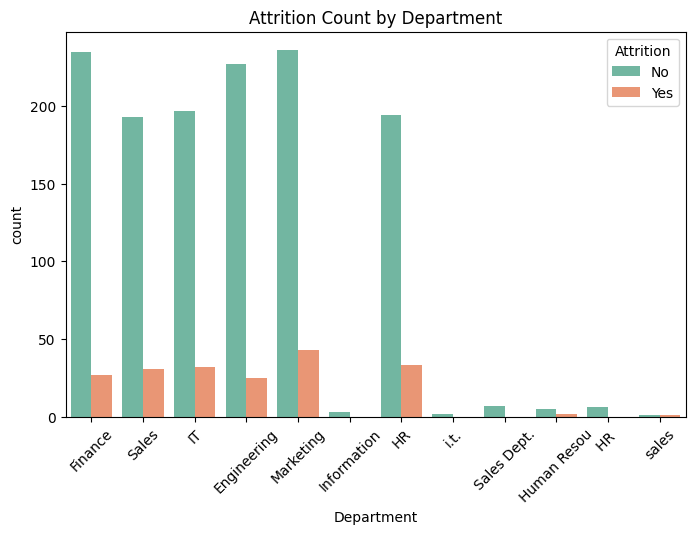

In [137]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')
plt.title("Attrition Count by Department")
plt.xticks(rotation=45)
plt.show()

# **Gender Distribution**

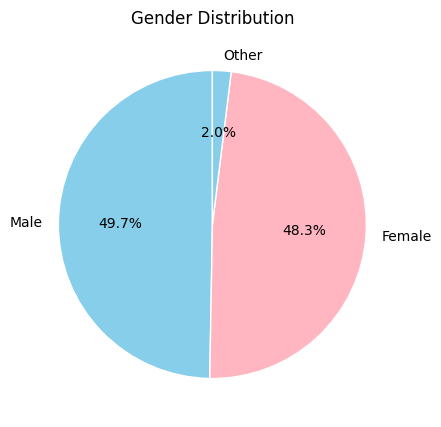

In [146]:
plt.figure(figsize=(5, 5))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['skyblue', 'lightpink'],wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()

# **Attrition Count by Education**

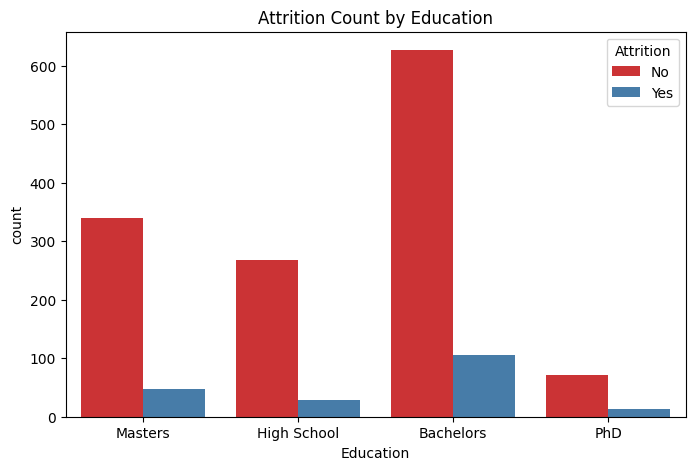

In [142]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Education', hue='Attrition', palette='Set1')
plt.title("Attrition Count by Education")
plt.show()

# **Heatmap of Correlations**

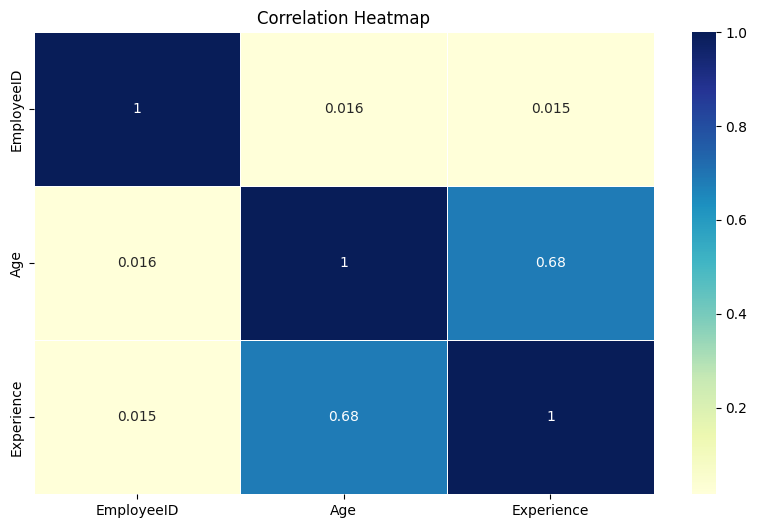

In [143]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()